## Center manifolds: 2D non-parametrized vector fields

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
params = {
    'xtick.labelbottom':'on',
    'ytick.labelleft':'on',
    'xtick.top':'on',
    'xtick.bottom':'on',
    'ytick.left':'on',
    'ytick.right':'on',
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.labelsize':'12',
    'ytick.labelsize':'12',
    'axes.labelsize':'22'
}

plt.rcParams.update(params)

In [3]:
def mesh_vector_field(lims, vfield):
    """
    Plot the vector field _vfield in a grid with limits _lims
    """
    xlims = lims[0]
    ylims = lims[1]
    xlo,xhi,ylo,yhi = xlims[0],xlims[1],ylims[0],ylims[1]
    XX, YY = np.meshgrid(np.arange(xlo,xhi,0.01), np.arange(ylo,yhi,0.01))
    DX, DY = vfield([XX, YY], 0)
    return XX,YY,DX,DY
    

----

Consider the following vector field

$$
\left\lbrace
\begin{aligned}
\dot{x} &= x^2 \\
\dot{y} &= -y - x^2
\end{aligned}
\right.
$$

In matrix form

$$
\left(
\begin{matrix}
\dot{x} \\
\dot{y}
\end{matrix}
\right)
=
\left(
\begin{matrix}
0 & 0 \\
0 & -1 \\
\end{matrix}
\right)
\left(
\begin{matrix}
x \\
y \\
\end{matrix}
\right)
+
\left(
\begin{matrix}
x^2 \\
-x^2 \\
\end{matrix}
\right).
$$

From the Jacobian at the fixed point $(\theta^*,v^*)=(0,0)$ we can obtain the eigenvalues and eigenvectors

$$
\quad\lambda_c = 0, \quad\lambda_s = -1,
\quad\boldsymbol{v}_c = (1,0)^T, \quad\boldsymbol{v}_s = (0, 1)^T.
$$

The eigenvectors are orthogonal. We can directly proceed to calculate the center manifold, which turns out to be

$$
K(x) = -x^2 - 2x^3 + O(x^4).
$$

In [4]:
def V(z, t):
    x = z[0]
    y = z[1]
    dxdt = x**2
    dydt = - y - x**2
    return [dxdt, dydt]

def K(x):
    return - x**2 - 2.*x**3

[Text(0.5, 0, '$x$')]

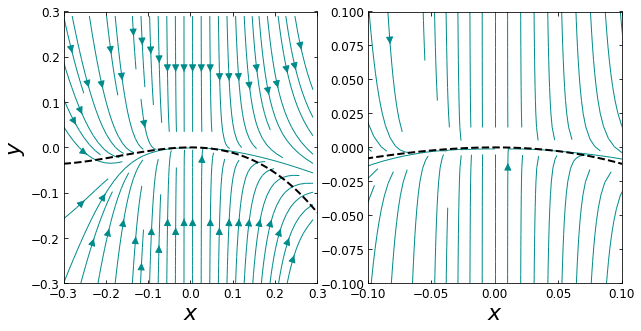

In [12]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

# far from the fixed point

xlo,xhi,ylo,yhi = -0.3,0.3,-0.3,0.3
lims = [[xlo,xhi],[ylo,yhi]]

x = np.linspace(xlo, xhi, 100)
k = [K(a) for a in x]
XX,YY,DX,DY = mesh_vector_field(lims, V)

ax1.plot(x, k, c='k', ls='--', lw=2)
ax1.streamplot(XX,YY,DX,DY,color='darkcyan',density=1.,minlength=0.2,linewidth=1, arrowsize=1.5)

ax1.set(xlim = lims[0], ylim = lims[1])
ax1.set(xlabel = r'$x$', ylabel = r'$y$')

# closer to the fixed point

xlo,xhi,ylo,yhi = -0.1,0.1,-0.1,0.1
lims = [[xlo,xhi],[ylo,yhi]]

ax2.plot(x, k, c='k', ls='--', lw=2)
ax2.streamplot(XX,YY,DX,DY,color='darkcyan',density=2.,minlength=0.2,linewidth=1, arrowsize=1.5)

ax2.set(xlim = lims[0], ylim = lims[1])
ax2.set(xlabel = r'$x$')

----

Consider the following vector field

$$
\left\lbrace
\begin{aligned}
\dot{\theta} &= - \theta + v^2 \\
\dot{v} &= -\sin\theta
\end{aligned}
\right.
$$

In matrix form

$$
\left(
\begin{matrix}
\dot{\theta} \\
\dot{v}
\end{matrix}
\right)
=
\left(
\begin{matrix}
-1 & 0 \\
-1 & 0 \\
\end{matrix}
\right)
\left(
\begin{matrix}
\theta \\
v \\
\end{matrix}
\right)
+
\left(
\begin{matrix}
v^2 \\
\frac{1}{3!}\theta^3 + O(\theta^4) \\
\end{matrix}
\right).
$$

From the Jacobian at the fixed point $(\theta^*,v^*)=(0,0)$ we can obtain the eigenvalues and eigenvectors

$$
\quad\lambda_c = 0, \quad\lambda_s = -1,
\quad\boldsymbol{v}_c = (0,1)^T, \quad\boldsymbol{v}_s = (1, 1)^T.
$$

The eigenvectors are non-orthogonal. In order to find the center manifold we must diagonalize.

The transformation matrix and it's inverse are given by

$$
T =
\left(
\begin{matrix}
0 & 1 \\
1 & 1 \\
\end{matrix}
\right)
\quad\text{and}\quad
T^{-1} =
\left(
\begin{matrix}
-1 & 1 \\
-1 & 0 \\
\end{matrix}
\right).
$$

Thus, the vector field in the new variables is

$$
\left(
\begin{matrix}
\dot{x} \\
\dot{y}
\end{matrix}
\right)
=
\left(
\begin{matrix}
0 & 0 \\
0 & -1 \\
\end{matrix}
\right)
\left(
\begin{matrix}
x \\
y \\
\end{matrix}
\right)
+
\left(
\begin{matrix}
-(x+y)^2 + \frac{1}{3!}y^3 + O(4) \\
(x+y)^2 \\
\end{matrix}
\right).
$$

The center manifold of the diagonal system is found to be

$$
K(x) = x^2 + 4x^3 + O(x^4).
$$

In [17]:
def V(z, t):
    x = z[0]
    y = z[1]
    dxdt = - np.sin(y)
    dydt = - y + x**2
    return [dxdt, dydt]

def K(x):
    return x**2 + 4.*x**3

[Text(0.5, 0, '$v$')]

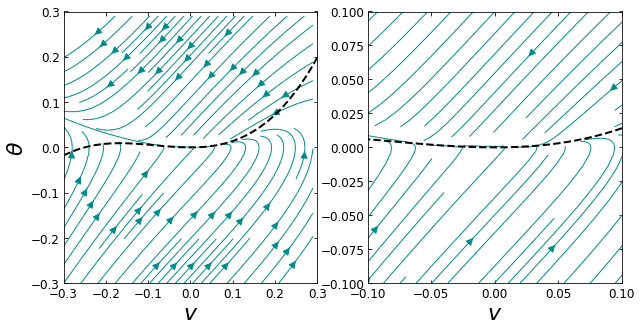

In [18]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

# far from the fixed point

xlo,xhi,ylo,yhi = -0.3,0.3,-0.3,0.3
lims = [[xlo,xhi],[ylo,yhi]]

x = np.linspace(xlo, xhi, 100)
k = [K(a) for a in x]
XX,YY,DX,DY = mesh_vector_field(lims, V)

ax1.plot(x, k, c='k', ls='--', lw=2)
ax1.streamplot(XX,YY,DX,DY,color='darkcyan',density=1.,minlength=0.2,linewidth=1, arrowsize=1.5)

ax1.set(xlim = lims[0], ylim = lims[1])
ax1.set(xlabel = r'$v$', ylabel = r'$\theta$')

# closer to the fixed point

xlo,xhi,ylo,yhi = -0.1,0.1,-0.1,0.1
lims = [[xlo,xhi],[ylo,yhi]]

ax2.plot(x, k, c='k', ls='--', lw=2)
ax2.streamplot(XX,YY,DX,DY,color='darkcyan',density=2.,minlength=0.2,linewidth=1, arrowsize=1.5)

ax2.set(xlim = lims[0], ylim = lims[1])
ax2.set(xlabel = r'$v$')

----

Consider the following vector field

$$
\left\lbrace
\begin{aligned}
\dot{x} &= \frac{1}{2}x + y + x^2y \\
\dot{y} &= x + 2y + y^2
\end{aligned}
\right.
$$

In matrix form

$$
\left(
\begin{matrix}
\dot{x} \\
\dot{y}
\end{matrix}
\right)
=
\left(
\begin{matrix}
1/2 & 1 \\
1 & 2 \\
\end{matrix}
\right)
\left(
\begin{matrix}
x \\
y \\
\end{matrix}
\right)
+
\left(
\begin{matrix}
x^2y \\
y^2 \\
\end{matrix}
\right).
$$

From the Jacobian at the fixed point $(\theta^*,v^*)=(0,0)$ we can obtain the eigenvalues and eigenvectors

$$
\quad\lambda_c = 0, \quad\lambda_u = 5/2,
\quad\boldsymbol{v}_c = (1,2)^T, \quad\boldsymbol{v}_s = (1, -1/2)^T.
$$

The eigenvectors are non-orthogonal. In order to find the center manifold we must diagonalize.

The transformation matrix and it's inverse are given by

$$
T =
\left(
\begin{matrix}
1 & 1 \\
-1/2 & 2 \\
\end{matrix}
\right)
\quad\text{and}\quad
T^{-1} =
\left(
\begin{matrix}
4/5 & -2/5 \\
1/5 & 2/5 \\
\end{matrix}
\right).
$$

Thus, the vector field in the new variables is

$$
\left(
\begin{matrix}
\dot{u} \\
\dot{v}
\end{matrix}
\right)
=
\left(
\begin{matrix}
0 & 0 \\
0 & 5/2 \\
\end{matrix}
\right)
\left(
\begin{matrix}
u \\
v \\
\end{matrix}
\right)
+
\left(
\begin{matrix}
-\frac{1}{2}u^2 + 2v^2 + \frac{3}{2}uv \\
\frac{1}{4}u^2 + 4v^2 - 2uv \\
\end{matrix}
\right).
$$

The center manifold of the diagonal system is found to be

$$
K(u) = -\frac{1}{10}u^2 - \frac{1}{25}u^3 + O(u^4).
$$

In [27]:
def V(z, t):
    u = z[0]
    v = z[1]
    dudt = - 0.5*u**2 + 2.*v**2 + 1.5*u*v
    dvdt = 5.*v/2. + 0.25*u**2 + 4.*v**2 -2.*u*v
    return [dudt, dvdt]

def K(u):
    return -u**2/10. - 1.*u**3/25.

[Text(0.5, 0, '$u$')]

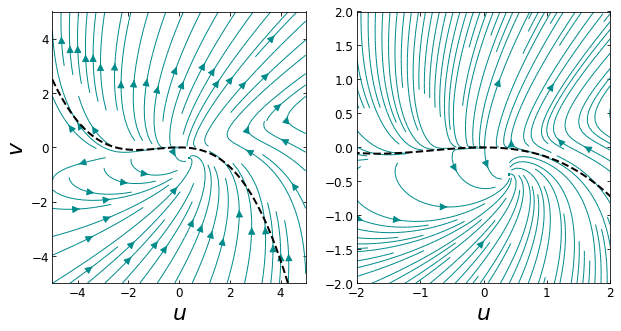

In [36]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

# far from the fixed point

xlo,xhi,ylo,yhi = -5.,5.,-5.,5.
lims = [[xlo,xhi],[ylo,yhi]]

x = np.linspace(xlo, xhi, 100)
k = [K(a) for a in x]
XX,YY,DX,DY = mesh_vector_field(lims, V)

ax1.plot(x, k, c='k', ls='--', lw=2)
ax1.streamplot(XX,YY,DX,DY,color='darkcyan',density=1.,minlength=0.2,linewidth=1, arrowsize=1.5)

ax1.set(xlim = lims[0], ylim = lims[1])
ax1.set(xlabel = r'$u$', ylabel = r'$v$')

# closer to the fixed point

xlo,xhi,ylo,yhi = -2.,2.,-2.,2.
lims = [[xlo,xhi],[ylo,yhi]]

ax2.plot(x, k, c='k', ls='--', lw=2)
ax2.streamplot(XX,YY,DX,DY,color='darkcyan',density=4.,minlength=0.2,linewidth=1, arrowsize=1.5)

ax2.set(xlim = lims[0], ylim = lims[1])
ax2.set(xlabel = r'$u$')